In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv("train.csv")  # import dataset
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.shape # check dimension

(891, 12)

In [4]:
df.columns # list of columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe() # description of dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()  # info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.Survived.nunique() # no. of unique values in target variable

2

In [8]:
df.Survived.unique() # unique values in target variable

array([0, 1], dtype=int64)

In [9]:
# percentage of survived and dead people in Titanic
print("Total percentage of people survived in Titanic: {}%.".format(round(df[df.Survived==1].shape[0]*100/df.shape[0],2)))
print("Total percentage of people dead in Titanic: {}%.".format(round(df[df.Survived==0].shape[0]*100/df.shape[0],2)))

Total percentage of people survived in Titanic: 38.38%.
Total percentage of people dead in Titanic: 61.62%.


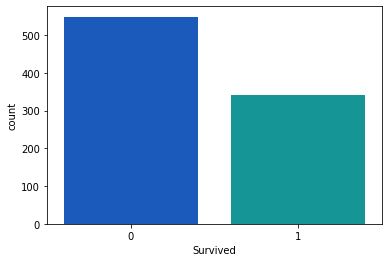

In [10]:
sns.countplot(df.Survived, palette="winter") # graph of survived and dead

In [11]:
df.isnull().sum() #no. of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# percentage of missing value
round((df.isnull().sum()*100)/ df.shape[0], 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [13]:
# selecting numerical and categorical columns
num_features = df.select_dtypes(include= np.number).columns
cat_features= df.select_dtypes(exclude = np.number).columns

In [14]:
print(num_features)
print(cat_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [15]:
# select only categorical features
df[cat_features].head(2)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


In [16]:
# Encoding Sex
df["Sex"]= df.Sex.map({"male":1, "female":0})
df[cat_features].head(2)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C85,C


# Filling of Null Values

In [17]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [18]:
df["Embarked"].mode()

0    S
dtype: object

In [19]:
df["Embarked"].isnull().sum()

2

In [20]:
df["Embarked"].fillna(value = "S", inplace = True)

In [21]:
#check if there is any other null value left
df["Embarked"].isnull().sum()

0

In [22]:
df["Age"].isnull().sum() # null values in age column

177

In [23]:
df["Age"].fillna(value= df["Age"].mean(), inplace= True)

In [24]:
df["Age"].isnull().sum()

0

In [25]:
# Dropping values
df.drop(["Name","Ticket"], axis=1, inplace=True)

In [26]:
df["Cabin"].isnull().sum()

687

In [27]:
# drop cabin also as there are many null values
df.drop(["Cabin"], axis=1, inplace= True)

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C


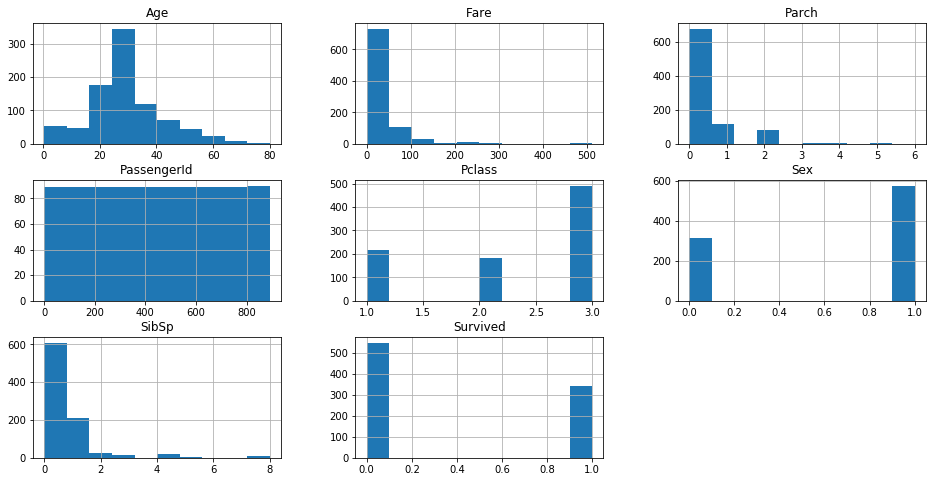

In [29]:
df.hist(figsize=(16,8))
plt.show()

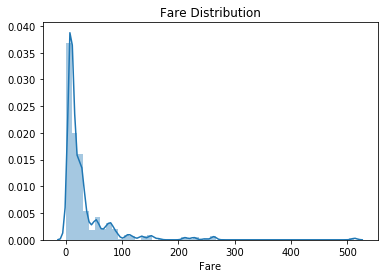

In [30]:
sns.distplot(df.Fare)
plt.xlabel("Fare")
plt.title("Fare Distribution")
plt.show()

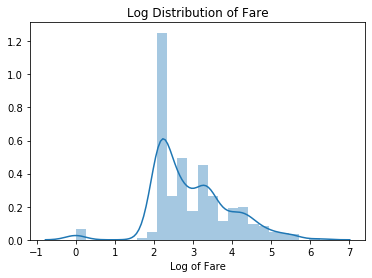

In [31]:
sns.distplot(np.log1p(df.Fare))
plt.xlabel("Log of Fare")
plt.title("Log Distribution of Fare")
plt.show()

In [32]:
print("The standard deviation of Fare is {}.".format(round(np.std(df.Fare),2)))
print("The standard deviation of log of Fare is {}.".format(np.std(np.log1p(df.Fare))))

The standard deviation of Fare is 49.67.
The standard deviation of log of Fare is 0.9685043193244568.


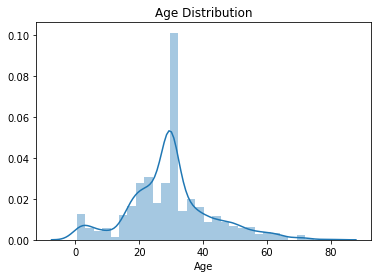

In [33]:
sns.distplot(df.Age)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

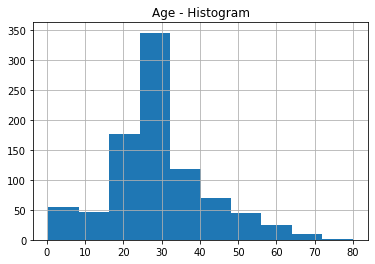

In [34]:
df.hist("Age")
plt.title("Age - Histogram")
plt.show()

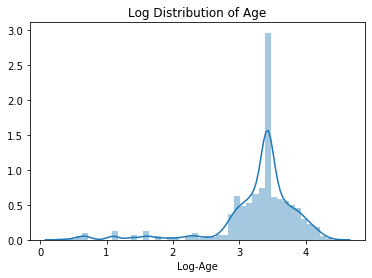

In [35]:
sns.distplot(np.log1p(df.Age))
plt.xlabel("Log-Age")
plt.title("Log Distribution of Age")
plt.show()

In [36]:
print("Standard Deviation of Age: {}.".format(np.std(df.Age)))
print("Standard Deviation of Log of Age: {}.".format(np.std(np.log1p(df.Age))))

Standard Deviation of Age: 12.994716872789033.
Standard Deviation of Log of Age: 0.6154586521646729.


In [37]:
df["Pclass"]=df.Pclass.map({1:"A", 2:"B", 3:"C"})
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,C,1,22.0,1,0,7.2500,S
1,2,1,A,0,38.0,1,0,71.2833,C


In [38]:
df2 = pd.get_dummies(df)
df2.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0,1,0,0


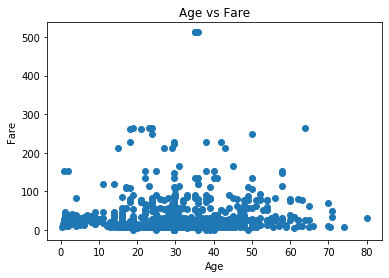

In [39]:
#scatter plot
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

In [40]:
df.corr()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Sex,0.042939,-0.543351,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.182333,0.091566,0.159651,0.216225,1.000000


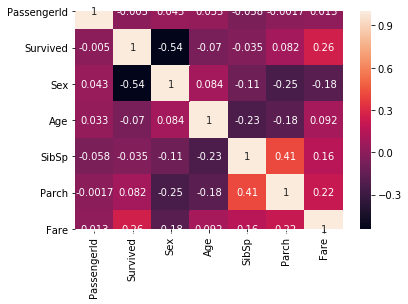

In [41]:
sns.heatmap(df.corr(), annot= True)
plt.show()

# Sklearn or scikit learn is used for model building

In [42]:
import sklearn as sk

In [43]:
#important functions from sklearn package
from sklearn.linear_model import RidgeClassifierCV, RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, auc, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
df2.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0,1,0,0


In [46]:
# transform Fare and Age
df2.Fare = np.log1p(df.Fare)
df2.Age = np.log1p(df.Age)

In [47]:
df2.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,3.135494,1,0,2.110213,0,0,1,0,0,1
1,2,1,0,3.663562,1,0,4.280593,1,0,0,1,0,0


In [48]:
df2.shape

(891, 13)

# Test dataset

In [49]:
df_test = pd.read_csv("test.csv")
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
### drop Name, cabin, ticket
df_test.drop(['Name','Cabin', 'Ticket'], axis=1, inplace=True)

In [51]:
df_test['Sex']= df_test['Sex'].map({'male':1, 'female': 0})

In [52]:
df_test['Age']= df_test['Age'].fillna(value= np.mean(df_test.Age))

In [53]:
df_test['Fare']= df_test['Fare'].fillna(value= np.mean(df_test.Fare))

In [54]:
df_test.Age= np.log1p(df_test.Age)
df_test.Fare = np.log1p(df_test.Fare)

In [55]:
df_test["Pclass"]= df_test["Pclass"].map({1:"A", 2:"B", 3:"C"})

In [56]:
df_test = pd.get_dummies(df_test)

In [57]:
df_test.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,892,1,3.569533,0,0,2.178064,0,0,1,0,1,0
1,893,0,3.871201,1,0,2.079442,0,0,1,0,0,1


In [58]:
df_test.shape

(418, 12)

# spliting training data into train and validation sets

In [59]:
df2.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_A', 'Pclass_B', 'Pclass_C', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [60]:
df_test.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_A',
       'Pclass_B', 'Pclass_C', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [61]:
X = df2[['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_A', 'Pclass_B', 'Pclass_C', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
Y = df2["Survived"]
P = df_test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_A',
       'Pclass_B', 'Pclass_C', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]


In [62]:
# Scaling 
scale = StandardScaler()
scale = scale.fit(X)
X_ = scale.transform(X) #scaling of Train Features
X_test= scale.transform(P) #scaling of test feature


In [63]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state= 56, stratify= Y)

In [64]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(891, 11)
(891,)
(712, 11)
(712,)
(179, 11)
(179,)


In [65]:
# Base Model
model_train = LogisticRegression()
model_train = model_train.fit(X_train, Y_train) ### Training

In [71]:
train_pred = model_train.predict(X_train)
val_pred = model_train.predict(X_val)

In [87]:
#model evaluation
print('Train Accuracy',accuracy_score(Y_train, train_pred)) ####
print('Validation Accuracy',accuracy_score(Y_val, val_pred))

Train Accuracy 0.8286516853932584
Validation Accuracy 0.7653631284916201


In [90]:
scores = cross_val_score(model_train, X_train, Y_train, scoring = 'accuracy', cv=5 )
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.81118881 0.75524476 0.8041958  0.85915493 0.87234043]
0.82042494514775
0.04193417971006615


In [93]:
## Randomforest Classifier
model_rf= RandomForestClassifier()
model_rf.fit(X_train, Y_train)
print(accuracy_score(Y_train, model_rf.predict(X_train)))
print(accuracy_score(Y_val, model_rf.predict(X_val)))

0.9662921348314607
0.770949720670391


In [96]:
## RF gridsearchcv
param = {'max_depth': [1,2,3,4],
        'max_features': ['auto', 'sqrt']}
gs_rf = GridSearchCV(estimator= RandomForestClassifier(), param_grid = param, scoring = 'accuracy', cv=3, n_jobs=-1)

In [98]:
gs_rf = gs_rf.fit(X_train, Y_train)
print(accuracy_score(Y_train, gs_rf.predict(X_train)))
print(accuracy_score(Y_val, gs_rf.predict(X_val)))

0.8398876404494382
0.8044692737430168


In [73]:
# training set accuracy with full data
model1_train= LogisticRegression()
model1_train= model1_train.fit(X, Y)

In [79]:
train1_pred = model1_train.predict(X)

In [86]:
#Accuracy
print("Train Accuracy", accuracy_score(Y, train1_pred))

Train Accuracy 0.8103254769921436


In [91]:
scores1 = cross_val_score(model1_train, X, Y, scoring = 'accuracy', cv=5 )
print(scores1)
print(np.mean(scores1))
print(np.std(scores1))

[0.7877095  0.80446927 0.78089888 0.78089888 0.84180791]
0.7991568866726458
0.023000364418893395


In [81]:
## prediction on the test.csv

y_test = model1_train.predict(P)

In [99]:
y1_test = gs_rf.predict(P)
print(y1_test.shape)

(418,)


In [83]:
print(P.shape)
print(y_test.shape)

(418, 11)
(418,)


In [84]:
### Create a new column 'Survived' in df_test and save the predictions
df_test['Survived'] = y_test
df_test.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,1,3.569533,0,0,2.178064,0,0,1,0,1,0,0
1,893,0,3.871201,1,0,2.079442,0,0,1,0,0,1,0


In [85]:
## save dataframe as csv file
df_test[['PassengerId', 'Survived']].to_csv('submission.csv', index = False)

In [101]:
df_test['Survived']= y1_test
df_test.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,1,3.569533,0,0,2.178064,0,0,1,0,1,0,0
1,893,0,3.871201,1,0,2.079442,0,0,1,0,0,1,0


In [102]:
df_test[['PassengerId', 'Survived']].to_csv('submission.csv', index= False)